<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/CalculatingAndVisualizingAutocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

bikesharing_data = pd.read_csv(io.BytesIO(uploaded['bike_sharing_hourly.csv']))

Saving bike_sharing_hourly.csv to bike_sharing_hourly.csv


In [3]:
bikesharing_data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [8]:
bikesharing_data[['temp', 'hum']].describe()
# We see that the values are scaled

,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [10]:
# To see if there is any statistical relationship between Temperature and humidity
bikesharing_data[['temp', 'hum']].corr()

# Found no significant relationship

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [12]:
# Checking Autocorrelation of temperature with the lag of 2 (2 hours for our dataset)
# Autocorrelation is correlation of variable with itself with a lag in time.
bikesharing_data['temp'].autocorr(lag = 2)

# It indicates that temperature 2 hours ago is a strong predictor of temperature rightnow.

0.9806849149013231

In [13]:
bikesharing_data['temp'].autocorr(lag = 12)

0.8250709628213124

In [15]:
bikesharing_data['temp'].autocorr(lag = 100)
# As we keep increasing the time period, autocorrelation value drops

0.7953952940633573

In [16]:
bikesharing_data['temp'].autocorr(lag = 1000)

0.5446887907913696

In [17]:
bikesharing_data['hum'].autocorr(lag = 12)
# Humidity changes throughout the day

0.2008818842273834

Text(0.5, 0, 'Lags')

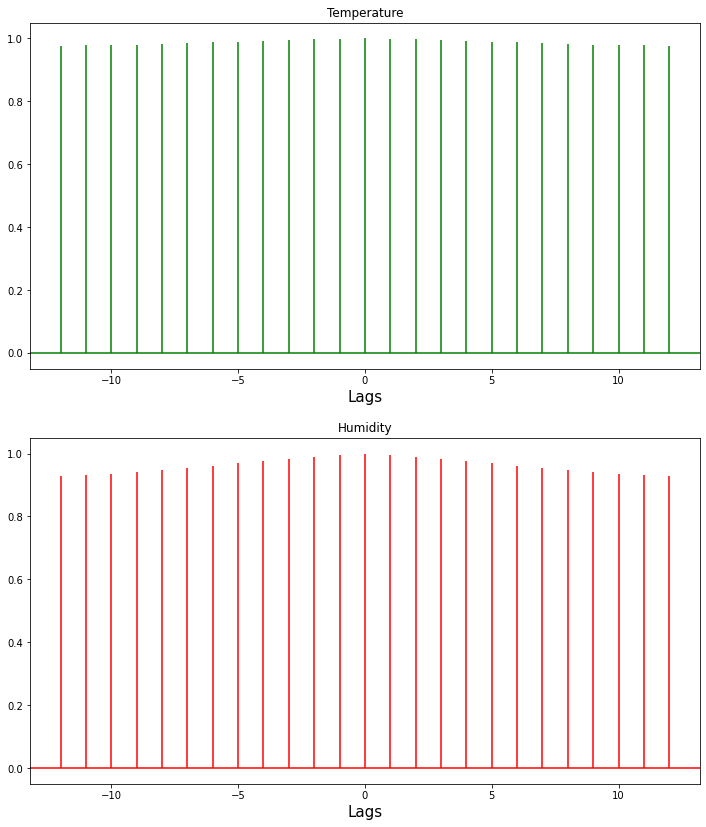

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,14))

ax1.acorr(bikesharing_data['temp'], maxlags=12, color='green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize = 15)

ax2.acorr(bikesharing_data['hum'], maxlags = 12, color = 'red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 15)


In [24]:
bikesharing_data['temp'].autocorr(lag = 24)

0.9148730709671982

In [25]:
bikesharing_data['hum'].autocorr(lag = 24)

0.4948813054393594

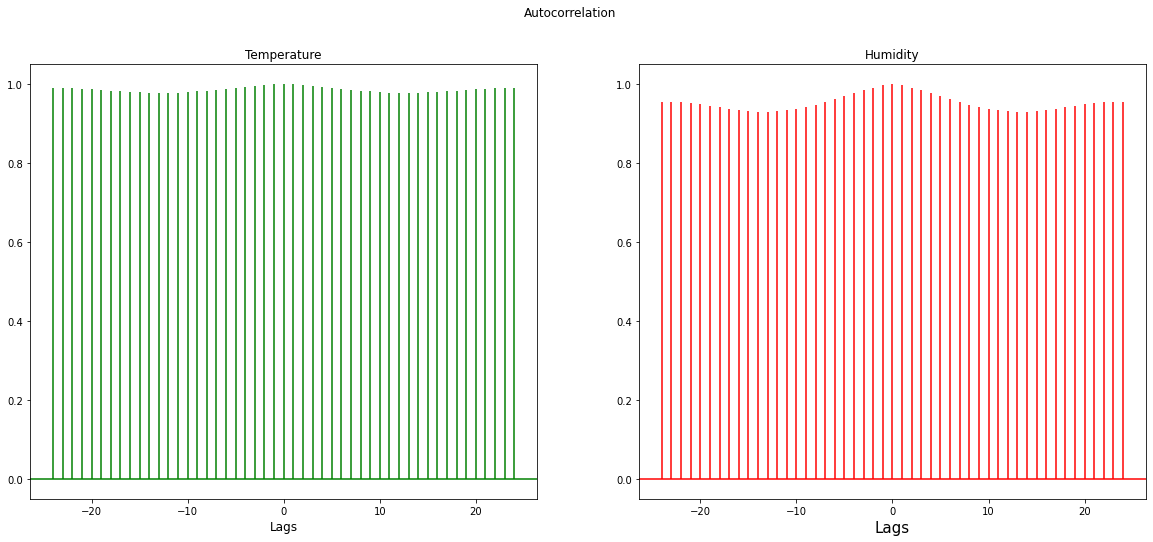

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

ax1.acorr(bikesharing_data['temp'], maxlags=24, color='green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize = 12)

ax2.acorr(bikesharing_data['hum'], maxlags = 24, color = 'red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 15)

plt.suptitle('Autocorrelation')
plt.show()

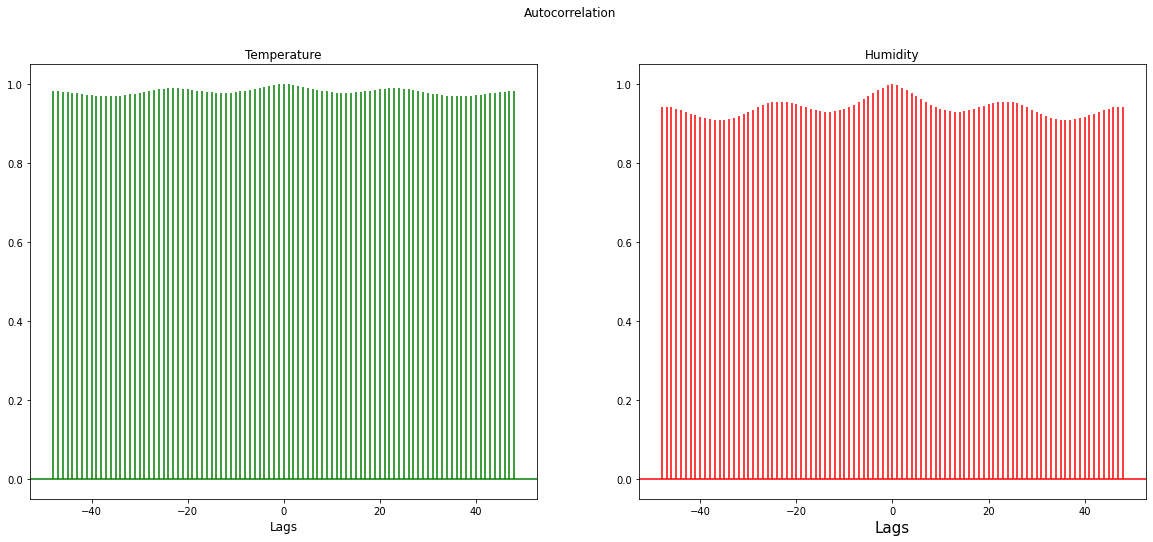

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

ax1.acorr(bikesharing_data['temp'], maxlags=48, color='green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize = 12)

ax2.acorr(bikesharing_data['hum'], maxlags = 48, color = 'red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 15)

plt.suptitle('Autocorrelation')
plt.show()

# Temperature and Humidity at the same time of the day are strongly correlated, but less correlated when compared across multiple days